<div style="text-align: right"> Author: Yashmine Noor Islami </div>

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset

In [2]:
df = pd.read_csv("loan_customer.csv")
# informasi general tentang dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

In [3]:
# Cek data sampel
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE


# Data Cleansing

## Handling missing values

In [4]:
#Detect missing value
df.isna().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

In [5]:
# drop kolom has_credit_card
df = df.drop(columns = ["has_credit_card"])

In [6]:
# drop baris dengan missing values
df = df.dropna()

In [7]:
# cek apakah sudah berhasil
df.isna().sum()

loan_id               0
birth_date            0
phone_number          0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
property_type         0
loan_status           0
dtype: int64

## Handling duplicated data

In [8]:
# cek jumlah duplicated rows
# dari semua kolom
df.duplicated().sum()

5

In [9]:
# drop duplicated rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## Handling Outlier

In [10]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

#for col in ['applicant_income','coapplicant_income', 'loan_amount', 'loan_term_month', 'loan_term_year']:
for col in ['applicant_income','coapplicant_income']:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1
  low_limit = Q1 - 1.5*IQR
  high_limit = Q3 + 1.5*IQR
  df = df[(df[col] >= low_limit) & (df[col] <= high_limit)]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 429
Jumlah baris setelah memfilter outlier: 386


## Feature Encoding

In [11]:
# pengecekan nilai/entri dari kolom-kolom kategorikal
cats_updated = ['gender', 'married', 'education', 'self_employed', 'property_type', 'loan_status']

for col in cats_updated:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column gender
Male      315
Female     71
Name: gender, dtype: int64
------------------------------ 

value counts of column married
Yes    243
No     143
Name: married, dtype: int64
------------------------------ 

value counts of column education
Graduate        293
Not Graduate     93
Name: education, dtype: int64
------------------------------ 

value counts of column self_employed
No     344
Yes     42
Name: self_employed, dtype: int64
------------------------------ 

value counts of column property_type
apartment    155
house        122
studio       109
Name: property_type, dtype: int64
------------------------------ 

value counts of column loan_status
APPROVE    268
REJECT     118
Name: loan_status, dtype: int64
------------------------------ 



In [12]:
# label encoding
# untuk kolom gender married education
mapping_gender = {
    'Female' : 0,
    'Male' : 1
}

mapping_married = {
    'No' : 0,
    'Yes' : 1
}

mapping_education = {
    'Not Graduate' : 0,
    'Graduate' : 1
}

mapping_self_employed = {
    'No' : 0,
    'Yes' : 1
}

mapping_property_type = {
    'apartment' : 0,
    'house' : 1,
    'studio' : 2
}

mapping_loan_status = {
    'REJECT' : 0,
    'APPROVE' : 1
}

df['gender'] = df['gender'].map(mapping_gender)
df['married'] = df['married'].map(mapping_married)
df['education'] = df['education'].map(mapping_education)
df['self_employed'] = df['self_employed'].map(mapping_self_employed)
df['property_type'] = df['property_type'].map(mapping_property_type)
df['loan_status'] = df['loan_status'].map(mapping_loan_status)

In [13]:
df.to_csv('loan_customer_preprocessing.csv')

# Business Insight

## Analisis minat pelanggan berdasarkan pada tipe properti

In [14]:
pivot1 = df.pivot_table(index=['property_type','gender'], 
                           values = ['loan_amount'], 
                           aggfunc='sum')
pivot1

loan_amount
property_type gender             
0             0           4174000
              1          16418000
1             0           1913000
              1          13441000
2             0           2138000
              1          12857000

In [15]:
# Fungsi untuk menghitung total loan amount
def sumLoanAmount (df, gen, prop_typ) :
    loan = df[(df.gender == gen) & (df.property_type == prop_typ)]
    return loan['loan_amount'].sum()

In [16]:
labels = ['Apartment', 'House', 'Studio']

In [17]:
men = np.array([sumLoanAmount(df, 1, 0),
                sumLoanAmount(df, 1, 1),
                sumLoanAmount(df, 1, 2)])
print (men)

[16418000 13441000 12857000]


In [18]:
women = np.array([sumLoanAmount(df, 0, 0),
                  sumLoanAmount(df, 0, 1),
                  sumLoanAmount(df, 0, 2)])
print (women)

[4174000 1913000 2138000]


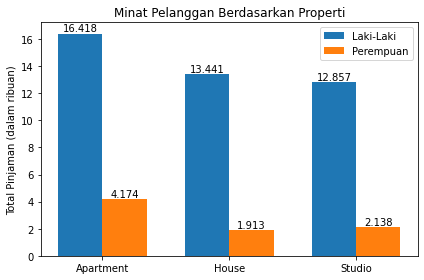

In [19]:
x = np.arange(len(labels))  # lokasi label
width = 0.35  # Lebar diagram

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men/1e6, width, label='Laki-Laki')
rects2 = ax.bar(x + width/2, women/1e6, width, label='Perempuan')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Pinjaman (dalam ribuan)')
ax.set_title('Minat Pelanggan Berdasarkan Properti')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=0)
ax.bar_label(rects2, padding=0)

fig.tight_layout()

fig.savefig('Analisis minat pelanggan berdasarkan pada tipe properti.svg', format='svg', dpi=1200)

plt.show()

## Analisis pengaruh status perkawinan terhadap jangka waktu meminjam 

In [20]:
pivot2 = df.pivot_table(index=['loan_term_year','married'], 
                           values = ['loan_status'], 
                           aggfunc='sum')
pivot2

loan_status
loan_term_year married             
3              0                  0
5              0                  1
               1                  1
7              1                  2
10             0                  1
               1                  1
15             0                  2
               1                 15
20             1                  1
25             0                  1
               1                  2
30             0                 83
               1                155
40             0                  0
               1                  3

In [21]:
# Fungsi untuk menghitung total loan amount
def sumLoanStatus (df, marry, loan) :
    loan = df[(df.married == marry) & (df.loan_term_year == labels[loan])]
    return loan['loan_status'].sum()

In [22]:
labels = [3,5,7,10,15,20,25,30,40]

In [23]:
mary = np.array([sumLoanStatus(df, 1, 0),
                 sumLoanStatus(df, 1, 1),
                 sumLoanStatus(df, 1, 2),
                 sumLoanStatus(df, 1, 3),
                 sumLoanStatus(df, 1, 4),
                 sumLoanStatus(df, 1, 5),
                 sumLoanStatus(df, 1, 6),
                 sumLoanStatus(df, 1, 7),
                 sumLoanStatus(df, 1, 8)])
print (mary)

[  0   1   2   1  15   1   2 155   3]


In [24]:
Nmary = np.array([sumLoanStatus(df, 0, 0),
                 sumLoanStatus(df, 0, 1),
                 sumLoanStatus(df, 0, 2),
                 sumLoanStatus(df, 0, 3),
                 sumLoanStatus(df, 0, 4),
                 sumLoanStatus(df, 0, 5),
                 sumLoanStatus(df, 0, 6),
                 sumLoanStatus(df, 0, 7),
                 sumLoanStatus(df, 0, 8)])
print (Nmary)

[ 0  1  0  1  2  0  1 83  0]


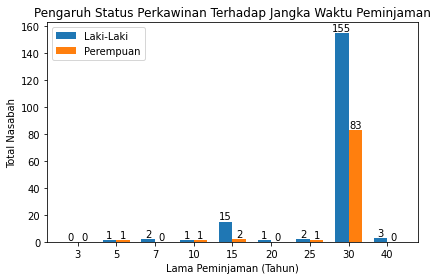

In [25]:
x = np.arange(len(labels))  # lokasi label
width = 0.35  # Lebar diagram

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mary, width, label='Laki-Laki')
rects2 = ax.bar(x + width/2, Nmary, width, label='Perempuan')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Nasabah')
ax.set_xlabel('Lama Peminjaman (Tahun)')
ax.set_title('Pengaruh Status Perkawinan Terhadap Jangka Waktu Peminjaman')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=0)
ax.bar_label(rects2, padding=0)

fig.tight_layout()

fig.savefig('Analisis pengaruh status perkawinan terhadap jangka waktu meminjam.svg', format='svg', dpi=1200)

plt.show()